# Descripción del proyecto <br>
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias<br>.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 20<br>17.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de <br>2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o <br>Adulto.

## Prepara los datos
Reemplaza nombres de columnas (minusculas)<br>
Convierte los datos en los tipos necesarios.<br>
Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.na separada.<br>
Trabaja con los valores ausentes, describe como tratarlos y porque <br>

#### Descripcion del Dataset
- Ventas online de tienda Ice a nivel mundial (Se describen ventas en NA (Norteaerica), EU(Union Europea), JP(Japon), Other Sales(Otras regiones))
- Cuenta con informacion de: Reseñas de usuarios y expertos, genero del juego, plataformas, datos historicos sobre ventas, rating(clasificacion de cada juego, se asigna una clasificación general según la edad recomendada, E (todos), E10+ (mayores de 10), T (adolescentes), M (mayores de 17), AO (solo adultos) en ESRB)

In [1]:
#Importamos las librerias que posiblemente podamos utilizar, si mas adelante se necesitan mas, las integramos
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Aplicamos info, para conocer el resumen del Df inicial
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#Tomamos una muestra general del DF, para conocer de forma general los datos en diversas partes del mismo
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10309,Rock Band: Metal Track Pack,Wii,2009.0,Misc,0.10,0.00,0.00,0.01,NaN,tbd,T
15829,Nano Diver,PSP,2011.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4664,pro evolution soccer 2011,PS2,2010.0,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E
7453,Prison Break: The Conspiracy,X360,2010.0,Action,0.07,0.11,0.00,0.02,40.0,4.7,T
5010,FIFA 17,X360,2016.0,Sports,0.07,0.28,0.00,0.03,NaN,1.7,E
10936,Scooby-Doo! Who's Watching Who?,DS,2006.0,Adventure,0.08,0.01,0.00,0.01,NaN,NaN,NaN
2274,Tokyo Xtreme Racer 3,PS2,2003.0,Racing,0.35,0.27,0.21,0.09,63.0,8.9,E
6333,Shadow of Rome,PS2,2005.0,Action,0.13,0.10,0.00,0.03,75.0,8.3,M
15812,Ginga Tetsudou 999 DS,DS,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5219,ATV/Monster Truck Mayhem,DS,2007.0,Racing,0.33,0.00,0.00,0.02,NaN,NaN,NaN


In [4]:
#Aplicamos el metodo isna sum para conocer el numero total de valores nulos en cada columna
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#Cambiamos los nombres de las columnas a minusculas, con el objetivo de tener unificados los criterios
games.columns = [col.lower() for col in games.columns]
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
#Rellenamos valores nulos con 0 los valores de columnas numericas
games[['year_of_release','critic_score','user_score']] = games[['year_of_release','critic_score','user_score']].fillna(0)

In [7]:
#verificamos el cambio
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#convertimos a enteros los valores de la columna year_of_release
games[['year_of_release','critic_score']] = games[['year_of_release','critic_score']].astype('int')

In [9]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0,NaN


#### Se identifican filas con valores nulos en las columnas name y genre

Esto puede ser debido a que no se realizaron en el momento de hacer el registro de juego, ademas datan de fechas anteriores (1993)

In [10]:
col_name = 'name'
filas_con_nan = games[games[col_name].isna()]
filas_con_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,0,NaN


In [11]:
games_rating = games['rating'].isna().sum()
games_rating

6766

In [12]:
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8351,Nightmare Creatures II,PS,2000,Action,0.09,0.06,0.00,0.01,0,0,NaN
2107,Dead Space 3,X360,2013,Action,0.64,0.26,0.00,0.08,78,6.4,M
11090,Justice League Heroes,DS,2006,Role-Playing,0.08,0.00,0.00,0.01,43,5.7,E10+
7132,Mary-Kate and Ashley: Sweet 16 - Licenced to D...,GC,2003,Misc,0.17,0.04,0.00,0.01,0,0,NaN
11414,Guilty Gear Xrd -Revelator-,PS4,2016,Fighting,0.03,0.00,0.05,0.01,0,0,NaN
5289,One Piece: Gigant Battle 2 Shin Sekai,DS,2011,Fighting,0.00,0.00,0.35,0.00,0,0,NaN
2670,Twisted Metal: Head On,PSP,2005,Action,0.71,0.00,0.00,0.06,79,8.2,T
13048,TV Anime: Fairy Tale Gekitou! Madoushi Kessen,DS,2010,Fighting,0.00,0.00,0.05,0.00,0,0,NaN
3190,A Bug's Life,N64,1998,Platform,0.49,0.13,0.00,0.01,0,0,NaN
14829,Driver: Parallel Lines,Wii,2007,Racing,0.01,0.01,0.00,0.00,59,6,M


#### Calcular las ventas totales para cada juego (en todas las regiones)
#### Agregar una columna nueva con la suma de las ventas por juego, ordenado por año

In [13]:
sales_region = ['na_sales','eu_sales','jp_sales','other_sales']
sales_region_year = games[['name','year_of_release']+sales_region].copy()
sales_region_year[sales_region] = sales_region_year[sales_region].fillna(0)
sales_region_year['total_sales'] = sales_region_year[sales_region].sum(axis=1)
total_sales = sales_region_year.groupby(['name','year_of_release'])['total_sales'].sum().reset_index()
total_sales.sort_values(['year_of_release','total_sales'], ascending=False).head(10)

,name,year_of_release,total_sales
3203,FIFA 17,2016,11.48
7924,Pokemon Sun/Moon,2016,7.14
1352,Call of Duty: Infinite Warfare,2016,7.02
789,Battlefield 1,2016,6.70
11183,Tom Clancy's The Division,2016,6.38
11520,Uncharted 4: A Thief's End,2016,5.39
7544,Overwatch,2016,3.73
3331,Far Cry: Primal,2016,3.30
5861,Madden NFL 17,2016,3.26
6838,NBA 2K17,2016,3.16


In [14]:
total_sales['name'].duplicated().value_counts()

False    11559
True       868
Name: name, dtype: int64

Agrupar por nombre de juego y year_release, grafica de barras<br>
grafico de dispersion o histograma, mostrando las ventas por juego por año<br>
Determina para que periodo debes tomar datos, puedes calcular la media y la varianza y grafico de cajas <br>
grafica de barras para conocer el volumen de ventas por juego<br>
diagrama de cajas de ventas por plataforma<br>
grafico de dispersion entre reseñas y ventas<br>
comparativa entre juegos por plataforma<br>
Grafico de dispersion y correlacion entre reseñas y ventas<br>

#### Cuantos juegos fueron lanzados en diferentes años

In [15]:
juegos_año = games.groupby('year_of_release')['name'].count().reset_index()
juegos_año

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


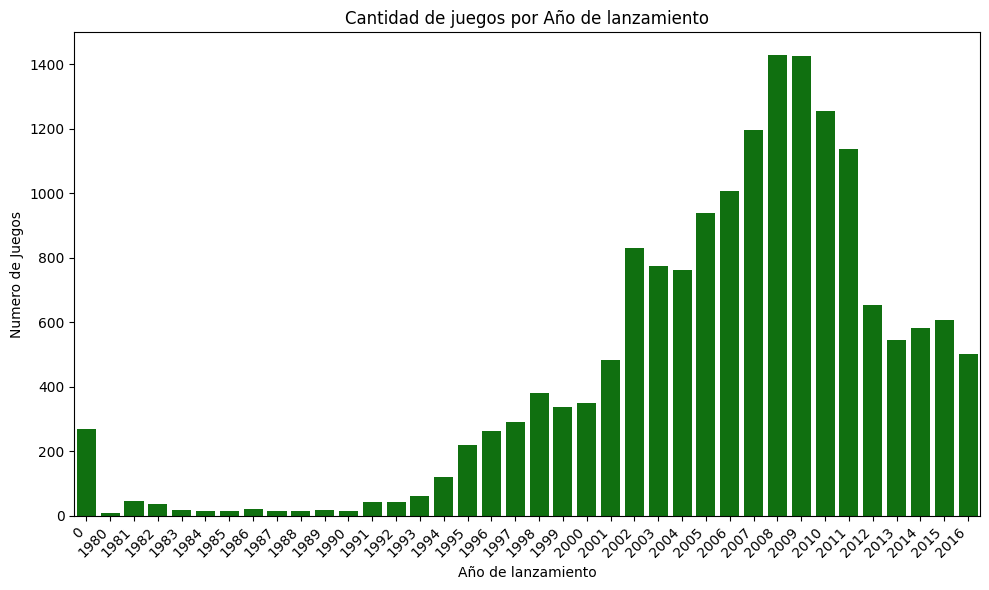

In [16]:
#Agregamos un grafico de barras que nos permita observar la tendencia de la cantidad de juegos respecto al año de lanzamiento
plt.figure(figsize=(10, 6))
sns.barplot(x='year_of_release', y='name', data=juegos_año, color='green')
plt.title('Cantidad de juegos por Año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Numero de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
region_sales = games[['na_sales','eu_sales','jp_sales','other_sales']]
games['total_sales'] = region_sales.sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN,31.38


In [18]:
#Agrupar solo por plataforma y año para sumar sus ventas y con ello poder graficar las ventas anuales por año de cada consola
ventas_plataforma = games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
ventas_plataforma.head()

,platform,year_of_release,total_sales
0,2600,0,10.50
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84


In [19]:
#Filtramos las filas que contienen año 0, para evitar disparidad a la hora de graficar
año_sin_0 = games[games['year_of_release'] != 0].copy()
vtas_sin_0 = año_sin_0.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
vtas_sin_0.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


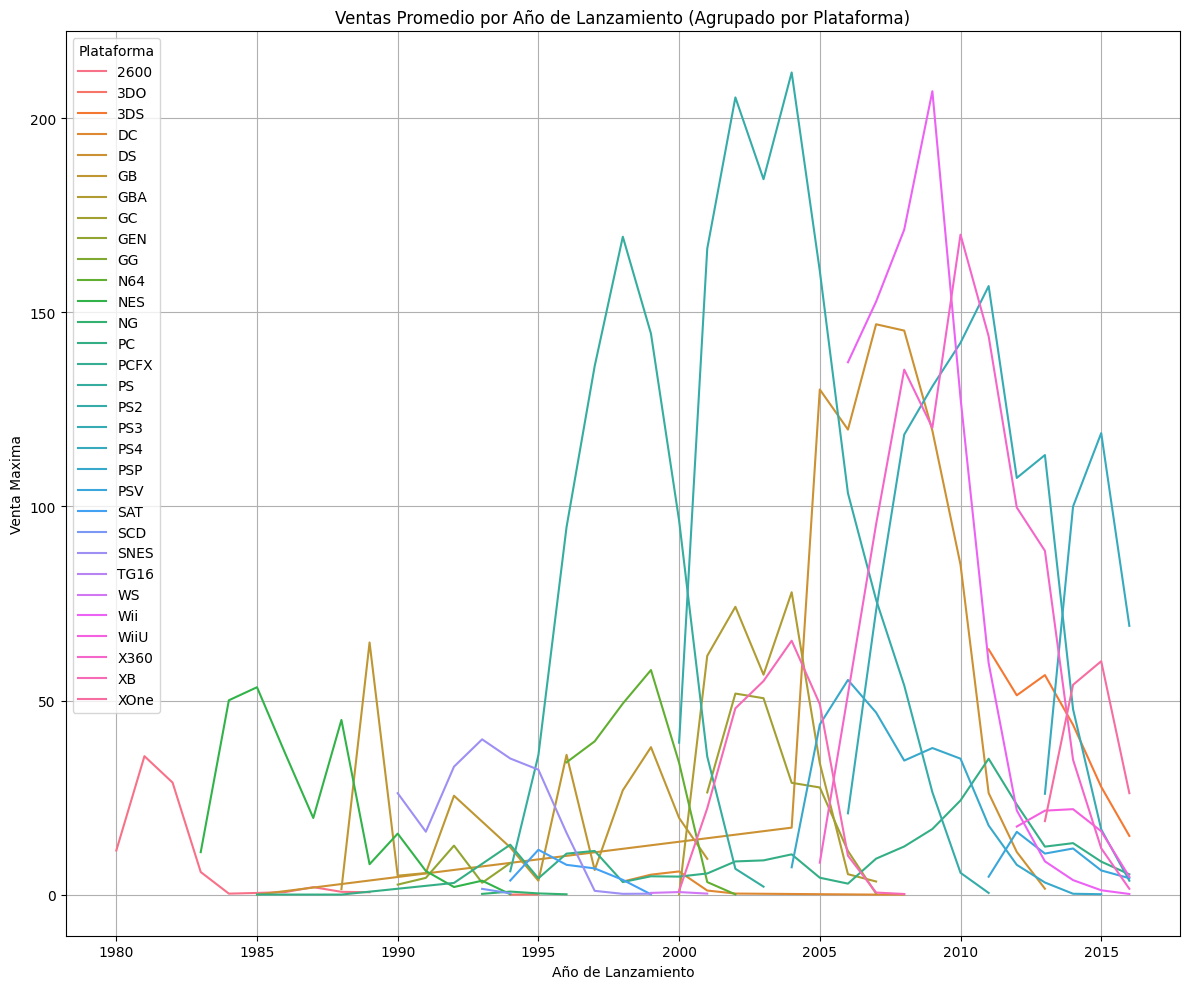

In [20]:
#Graficamos ventas por plataforma por año de lanzamiento
plt.figure(figsize=(12, 10))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform',data=vtas_sin_0)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Venta Maxima')
plt.title('Ventas Promedio por Año de Lanzamiento (Agrupado por Plataforma)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
#games_sin_año_cero = games[games['year_of_release'] != 0].copy()
#ventas_plataforma_sin_año_cero = games_sin_año_cero.groupby(['year_of_release', 'name', 'platform'])['total_sales'].agg(['count', 'mean', 'max'])
#ventas_plataforma_sin_año_cero

El grafico de arriba muestra la cantidad de ventas respecto a su año de lanzamiento, se muestra una tendencia de aprox 5 años entre cambios de plataformas mismas que se observan ampliamente mayores que sus predecesoras

**Como varian las ventas entre plataformas, crear df con nombres de plataformas, ventas totales, año**<br>
(Realiza un Grafico de dispersion)

Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Para contestar esta pregunta basados en el grafico, parece ser mejor observarlo con un grafico de dispersion, se puede ver como van cambiando notoriamente los colores de las plataformas conforme avanza el tiempo, se logra percibir que aproximadamente la tendencia de cambio es cada 5 años, las ventas parecen mantenerse en promedio concentradas al mismo nivel, salvo excepciones en algunos casos como PS3 de las mas actuales (2008), y SNES (entre 1988 y 2005)

Determina para qué período debes tomar datos<br> 
Para hacerlo mira tus respuestas a las preguntas anteriores.<br> 
Los datos deberían permitirte construir un modelo para 2017.<br>

**Plataformas lideres en ventas(con  base en su año de lanzamiento)**<br>
Cuales son las plataformas que muestran mayores ventas

In [22]:
plataformas_lideres_ventas = games.groupby(['platform','year_of_release'])['total_sales'].sum().sort_values(ascending=False).reset_index()
plataformas_lideres_ventas.head()

,platform,year_of_release,total_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32


Las plataformas que mayores ventas se observan a lo largo de varios años son PS2,Wii, X360, DS, sin embargo, en este caso solo podemos observar las que muestra ayor cantidad de ventas en general, es dificil observar una tendencia clara

In [23]:
#Filtramos utlizando solo los años 2013 a 2016, con el objetivo de tener informacion actual y relevante, ya que la correspondiente a años anteriores
# no es necesaria
años = games['year_of_release'].isin([2013, 2014, 2015, 2016])
games_filtrado = games[años]
vtas_plat_filtro = games_filtrado.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
vtas_plat_filtro.sort_values(by=['total_sales','year_of_release'], ascending=False)

,platform,year_of_release,total_sales
15,PS4,2015,118.90
9,PS3,2013,113.25
14,PS4,2014,100.00
32,X360,2013,88.58
16,PS4,2016,69.25
38,XOne,2015,60.14
0,3DS,2013,56.57
37,XOne,2014,54.07
10,PS3,2014,47.76
1,3DS,2014,43.76


**Ventas globales por plataforma**

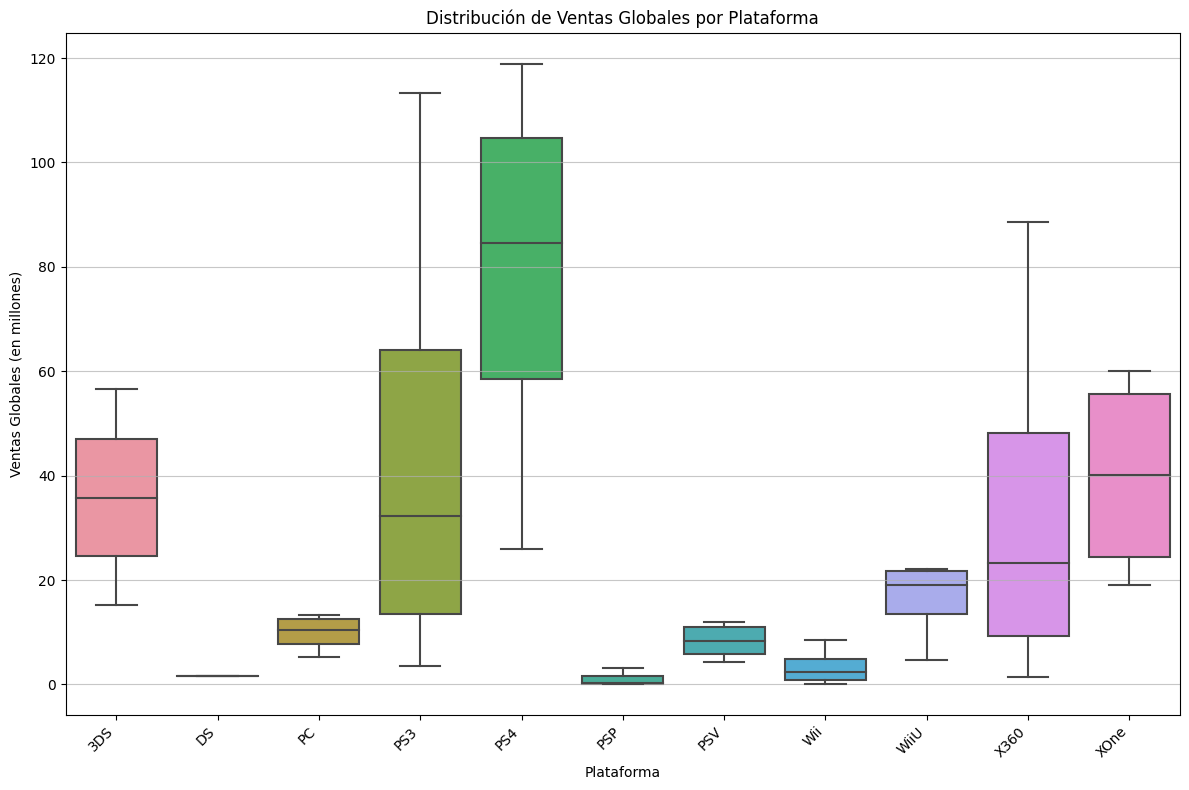

,platform,total_sales
0,PS4,78.535000
1,PS3,45.357500
2,XOne,39.830000
3,3DS,35.812500
4,X360,34.200000
5,WiiU,16.157500
6,PC,9.857500
7,PSV,8.247500
8,Wii,3.415000
9,DS,1.540000


In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=vtas_plat_filtro)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Calcular las ventas promedio por plataforma para complementar el boxplot
average_sales_by_platform = vtas_plat_filtro.groupby('platform')['total_sales'].mean().sort_values(ascending=False).reset_index()
average_sales_by_platform

**Coloco el grafico con la data completa, a manera de comparativa (games_filtrado)**

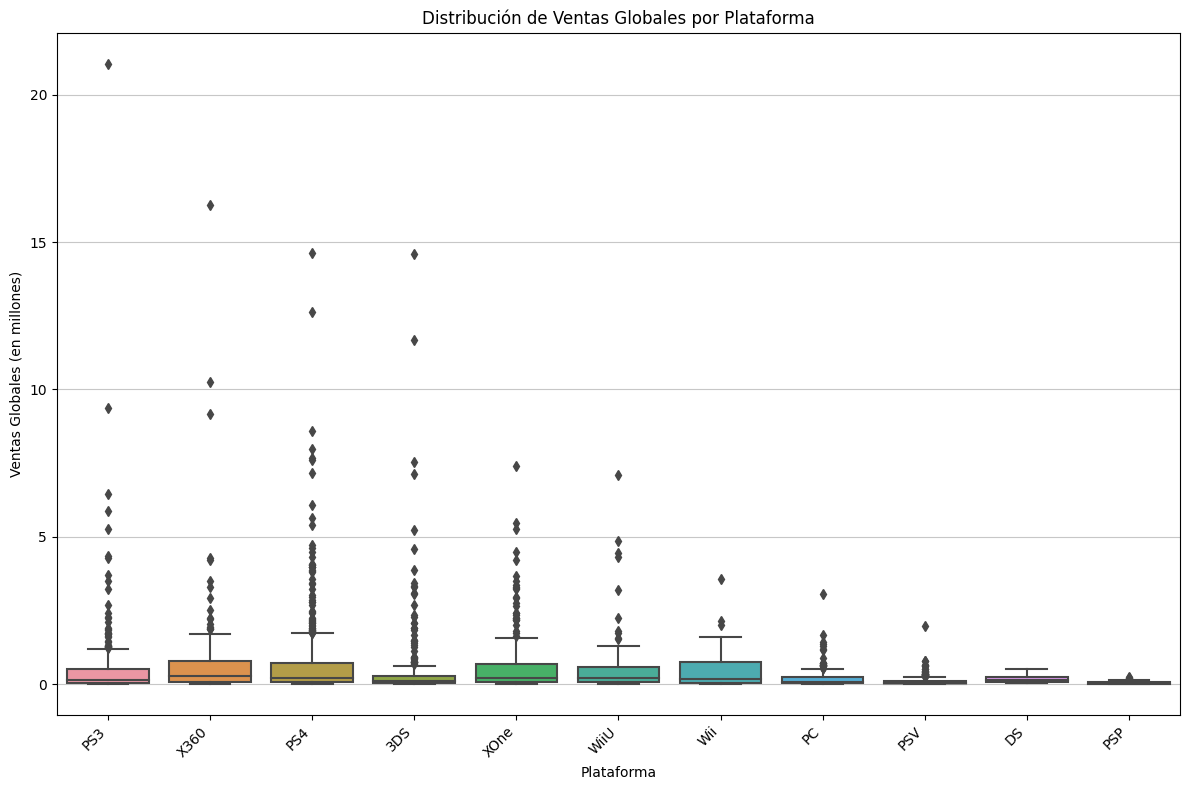

,platform,total_sales
0,PS4,0.801378
1,X360,0.735484
2,XOne,0.645020
3,Wii,0.593913
4,WiiU,0.562000
5,PS3,0.525884
6,3DS,0.472772
7,PC,0.208624
8,DS,0.192500
9,PSV,0.092151


In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=games_filtrado)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Calcular las ventas promedio por plataforma para complementar el boxplot
average_sales_by_platform = games_filtrado.groupby('platform')['total_sales'].mean().sort_values(ascending=False).reset_index()
average_sales_by_platform

**Descripcion de ventas totales**<br>

Las ventas muestran una tendencia en la consola PS4, PS3, seguida de Xbox one, mismas que se mantienen con un margen en cada año que se observan, por encima de las demas, inculuso en algunos casos, duplicando el valor en algunos casos<br>
Al descartar los años anteriores, se puede apreciar mucho mejor la cantidad de ventas y la tendencia que esta tiene conforme han transcurrido los años, debido a que muchas de las consolas se han descontinuado o simplemente se mantienen en otro tipo de mercado<br>

In [26]:
max_sales_by_platform = games.groupby('platform')['total_sales'].max().sort_values(ascending=False).reset_index()
max_sales_by_platform.head()

,platform,total_sales
0,Wii,82.54
1,NES,40.24
2,GB,31.38
3,DS,29.80
4,X360,21.82


**Correlacion entre Ventas totales y Reseñas**<br>
A continuacion se muestra un diagrama de dispersion donde se plasma las correlacion existente entre las ventas totales y las reseñas, al parecer a simple vista se puede ver una correlacion positiva, en funcion de que conforme las reseñas son mas altas, las ventas aumentan
Si aplicamos de forma particular para cada region el efecto observado es el mismo, existe una correlacion positiva, concentrandose la mayor cantidad de valores entre 80 y 100 de calificacion y menores a 20 millones


Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

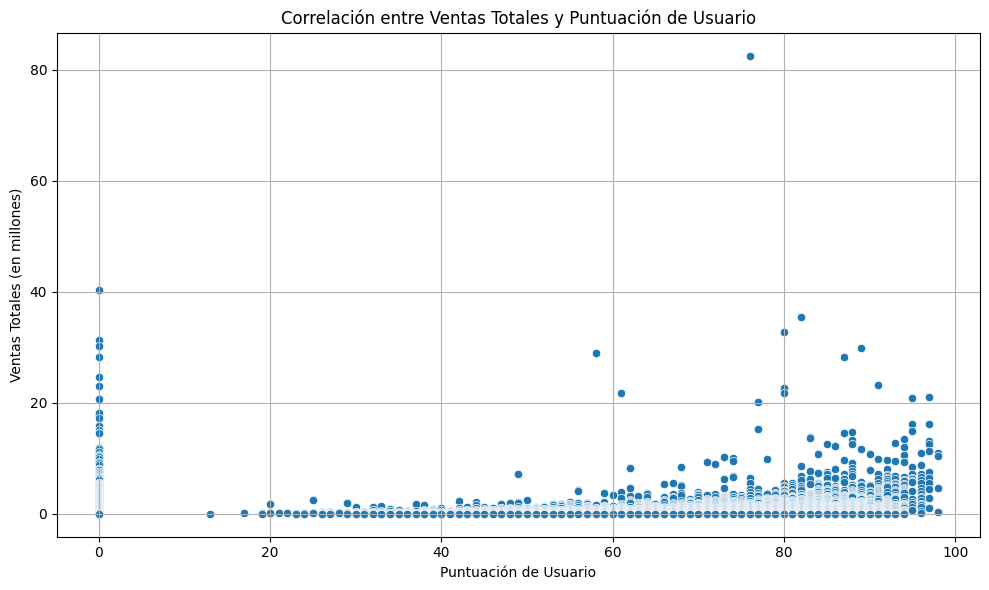

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=games)
plt.title('Correlación entre Ventas Totales y Puntuación de Usuario')
plt.xlabel('Puntuación de Usuario')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
corr_total_sales = games['critic_score'].corr(games['total_sales'])
print(f'coeficiente: {corr_total_sales:.2f}')

coeficiente: 0.15


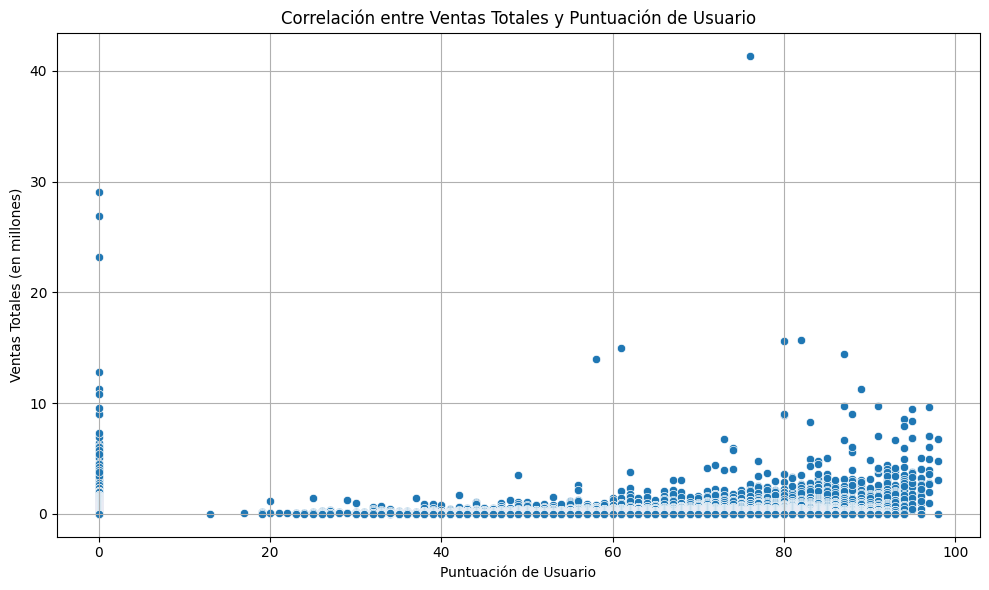

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='na_sales', data=games)
plt.title('Correlación entre Ventas Totales y Puntuación de Usuario')
plt.xlabel('Puntuación de Usuario')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
corr_na_sales = games['critic_score'].corr(games['na_sales'])
print(f'coeficiente: {corr_na_sales:.2f}')

coeficiente: 0.15


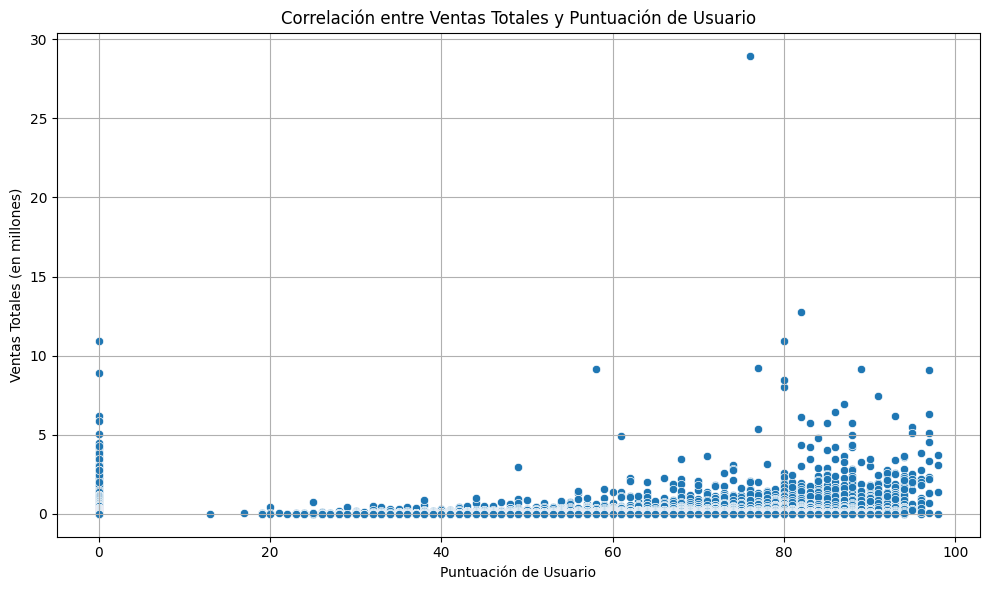

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='eu_sales', data=games)
plt.title('Correlación entre Ventas Totales y Puntuación de Usuario')
plt.xlabel('Puntuación de Usuario')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
corr_eu_sales = games['critic_score'].corr(games['eu_sales'])
print(f'coeficiente: {corr_eu_sales:.2f}')

coeficiente: 0.17


**Correlacion entre ventas y Plataforma wii**<br>:
De forma particular en esta plataforma, la tendencia se ve positiva, sin embargo a diferencia de la comparativa con todas las plataformas juntas, se observa una mayor acumulacion en la parte de reseñas entre 60 y 90, donde se observa una tendencia plana, pero con mayor acumulacion, de ventas respecto a las reseñas conforme la calificacion aumenta, sin embargo, despues de 90, son pocos los valores que se observan, incluso los valores que indican un aumento en las ventas son aislados, en su mayoria se concentran entre 0 y menos de 20 millones

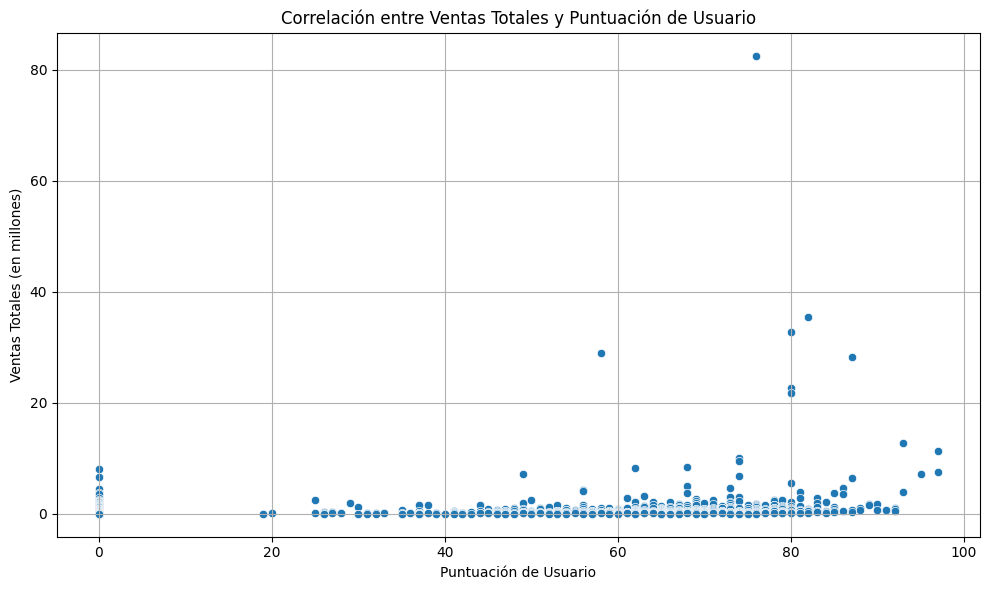

In [33]:
wii_games = games[(games['platform'] == 'Wii')].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=wii_games)
plt.title('Correlación entre Ventas Totales y Puntuación de Usuario')
plt.xlabel('Puntuación de Usuario')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
corr_wii_sales = wii_games['critic_score'].corr(wii_games['na_sales'])
print(f'coeficiente: {corr_na_sales:.2f}')

coeficiente: 0.15


**La correlacion existente derivada de las pruebas para cada region se considera una correlacion debil o nula, debido a su cercania con el 0, lo cual estaria indicando que es practicamnete nula la relacion existente entre las calificaciones de los usuarios y las ventas**

**Correlacion entre ventas y Plataforma wii y PSV**<br>:
En este caso, podemos observar de forma mas clara la diferencia existente entre dos plataformas, como ejemplo Wii y PSV, derivado de ello se observan mayor cantidad de ventas para los juegos en la plataforma wii, con una acumulacion aparente de entre 60 y 80 de calificacion, a diferencia de PSV, cuya acumulacion se observa mas concentrada en menores ventas, con rangos de calificaciones similares

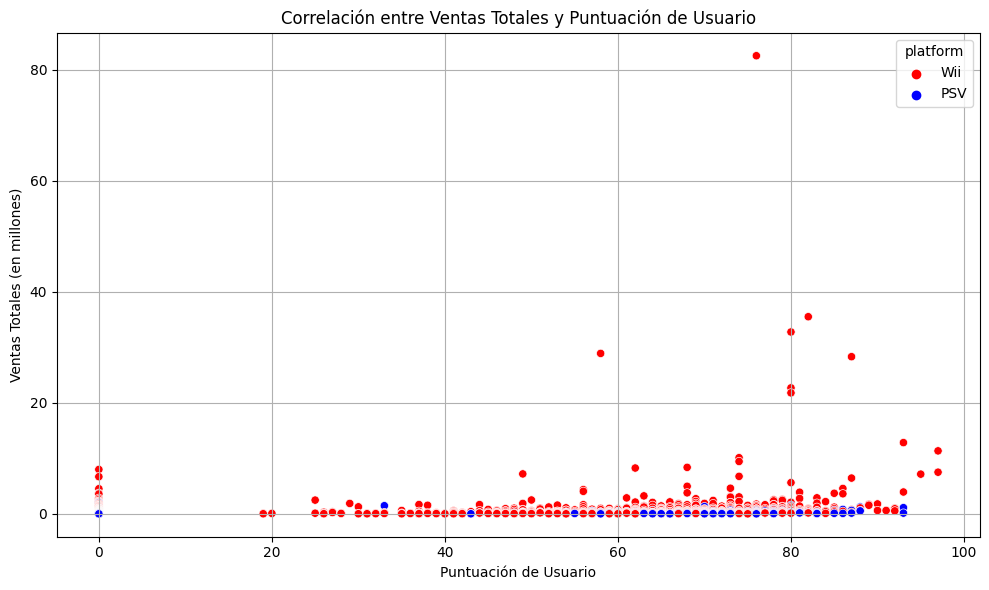

In [35]:
#Aplicamos correlacion entre las plataformas wii, PSV y ventas totales
wii_psv_games = games[(games['platform'] == 'Wii') | (games['platform'] == 'PSV')].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', hue='platform', data=wii_psv_games, palette=['red', 'blue'])
plt.title('Correlación entre Ventas Totales y Puntuación de Usuario')
plt.xlabel('Puntuación de Usuario')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
corr_wii_psv_sales = wii_psv_games['critic_score'].corr(wii_psv_games['na_sales'])
print(f'coeficiente: {corr_na_sales:.2f}')

coeficiente: 0.15


**Relacion de generos vs ventas**<br>
Se observa claramente que el genero 'Platform' (plataformas, saltos de destreza para avanzar entre niveles) lidera las ventas por encima de los demas generos, seguido del genero Shooter (disparos, cumplimiento de misiones) y los que menos ventas reflejan son los de aventuras y estrategia<br>
Con base en estos datos, solo podemos indicar que las ventas altas y bajas corresponden a estos generos, sin embargo, necesitariamos mayor informacion para conocer con certeza si existe como tal una tendencia o que estos generos mantengan esa tendencia sobre las ventas

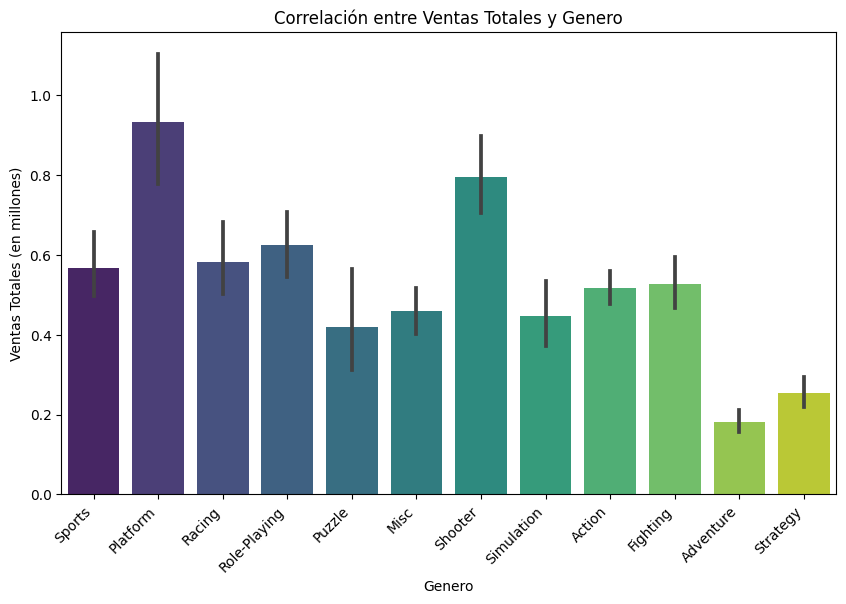

In [37]:
#cambiar colores a las barras
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='total_sales', data=games, palette='viridis')
plt.title('Correlación entre Ventas Totales y Genero')
plt.xlabel('Genero')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
#Venta promedio por genero

vta_prom_genero = games.groupby('genre')['total_sales'].mean().reset_index()
vta_prom_genero.sort_values(by='total_sales', ascending=False)

,genre,total_sales
4,Platform,0.932173
8,Shooter,0.795503
7,Role-Playing,0.623872
6,Racing,0.583403
10,Sports,0.566980
2,Fighting,0.527126
0,Action,0.517711
3,Misc,0.458577
9,Simulation,0.446701
5,Puzzle,0.418224


**Perfil para cada region**<br>
Las cinco plataformas principales. <br>
Describe las variaciones en sus cuotas de mercado de una región a otra.

In [39]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0,NaN,0.01


La cuota de mercado es un indicador que refleja el porcentaje de ventas de una empresa dentro de un mercado específico, comparando sus ventas con el total de ventas de ese mismo mercado.<br> Es una métrica clave para evaluar la posición de una empresa frente a sus competidores y comprender su tamaño en el mercado.<br>
Se calcula dividiendo las ventas de una empresa por el total de ventas del mercado y multiplicando el resultado por 100.<br>


**Cuotas de mercado por region**

In [40]:
games['cuota_mercado_na'] = (games['na_sales']/games['total_sales'])*100
games['cuota_mercado_eu'] = (games['eu_sales']/games['total_sales'])*100
games['cuota_mercado_jp'] = (games['jp_sales']/games['total_sales'])*100
games['cuota_mercado_os'] = (games['other_sales']/games['total_sales'])*100
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,cuota_mercado_na,cuota_mercado_eu,cuota_mercado_jp,cuota_mercado_os
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54,50.109038,35.086019,4.567482,10.237461
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,NaN,40.24,72.266402,8.896620,16.923459,1.913519
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,44.144144,35.923423,10.670045,9.262387
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77,47.635032,33.353677,10.009155,9.002136
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN,31.38,35.914595,28.330147,32.568515,3.186743


**Se utiliza nuevo dataset llamado games_filtrado con el periodos de años de 2013 a 2016**

In [41]:
games_filtrado

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,NaN,0.01


In [42]:
games_filtrado['cuota_mercado_na'] = (games_filtrado['na_sales']/games_filtrado['total_sales'])*100
games_filtrado['cuota_mercado_eu'] = (games_filtrado['eu_sales']/games_filtrado['total_sales'])*100
games_filtrado['cuota_mercado_jp'] = (games_filtrado['jp_sales']/games_filtrado['total_sales'])*100
games_filtrado['cuota_mercado_os'] = (games_filtrado['other_sales']/games_filtrado['total_sales'])*100
games_filtrado.head()

/tmp/ipykernel_247/380975882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_filtrado['cuota_mercado_na'] = (games_filtrado['na_sales']/games_filtrado['total_sales'])*100
/tmp/ipykernel_247/380975882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_filtrado['cuota_mercado_eu'] = (games_filtrado['eu_sales']/games_filtrado['total_sales'])*100
/tmp/ipykernel_247/380975882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,cuota_mercado_na,cuota_mercado_eu,cuota_mercado_jp,cuota_mercado_os
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,33.349169,43.182898,4.655582,18.812352
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,59.373079,31.591887,0.368777,8.666257
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,NaN,14.63,41.216678,40.054682,2.460697,16.267943
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,NaN,14.60,36.164384,28.698630,29.794521,5.342466
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,31.378764,50.000000,3.011094,15.610143


In [43]:
#Filtramos solo para los años que nos interesa conocer, quitando los años anteriores, esto nos dara una mayor visibilidad
# sobre las tendencias hacia 2017
cuotas_mean_filtrado = games_filtrado.groupby('platform')[['cuota_mercado_na','cuota_mercado_eu','cuota_mercado_jp','cuota_mercado_os']].mean().reset_index()
cuotas_mean_filtrado.head().sort_values(by=['cuota_mercado_eu', 'cuota_mercado_na','cuota_mercado_jp'], ascending=False)

,platform,cuota_mercado_na,cuota_mercado_eu,cuota_mercado_jp,cuota_mercado_os
2,PC,15.724493,80.126985,0.000000,4.148522
1,DS,23.619020,69.924658,0.000000,6.456322
4,PS4,31.195345,36.902603,20.013134,11.888918
3,PS3,24.301057,25.042889,41.323286,9.332768
0,3DS,18.223538,17.673502,61.715582,2.387377


In [44]:
cuotas_eu = games_filtrado.groupby('platform')['cuota_mercado_eu'].mean().reset_index()
cuotas_eu.head().sort_values(by= 'cuota_mercado_eu', ascending=False)

,platform,cuota_mercado_eu
2,PC,80.126985
1,DS,69.924658
4,PS4,36.902603
3,PS3,25.042889
0,3DS,17.673502


In [45]:
cuotas_jp = games_filtrado.groupby('platform')['cuota_mercado_jp'].mean().reset_index()
cuotas_jp.head().sort_values(by= 'cuota_mercado_jp', ascending=False)

,platform,cuota_mercado_jp
0,3DS,61.715582
3,PS3,41.323286
4,PS4,20.013134
1,DS,0.000000
2,PC,0.000000


In [46]:
cuotas_na = games_filtrado.groupby('platform')['cuota_mercado_na'].mean().reset_index()
cuotas_na.head().sort_values(by= 'cuota_mercado_na', ascending=False)

,platform,cuota_mercado_na
4,PS4,31.195345
3,PS3,24.301057
1,DS,23.619020
0,3DS,18.223538
2,PC,15.724493


In [47]:
cuotas_os = games_filtrado.groupby('platform')['cuota_mercado_os'].mean().reset_index()
cuotas_os.head().sort_values(by= 'cuota_mercado_os', ascending=False)

,platform,cuota_mercado_os
4,PS4,11.888918
3,PS3,9.332768
1,DS,6.456322
2,PC,4.148522
0,3DS,2.387377


Desglosamos de forma individual (por region y segmentado a 2013-2016) el top 5 de en cuota de mercado referente a cada consola, iniciando con el de mayor aporte

**Promedio en el consumo de mercado por region por plataforma**<br>
De forma general, parece haber una distribucion repartida entre la region japonesa (verde) y la region correspondiente a los estados unidos (azul), seguidas por la union europea y al final otras regiones.<br>
Podemos asumir que esta distribucion se debe en gran medida al tipo de consumidor por tipo de plataforma y a su vez quienes producen y crean el contenido y a su vez tambien lo consumen, ya que si nos enfocamos, como ejemplo en la plataforma PC, esta es donde parece tener mas presencia la union europea

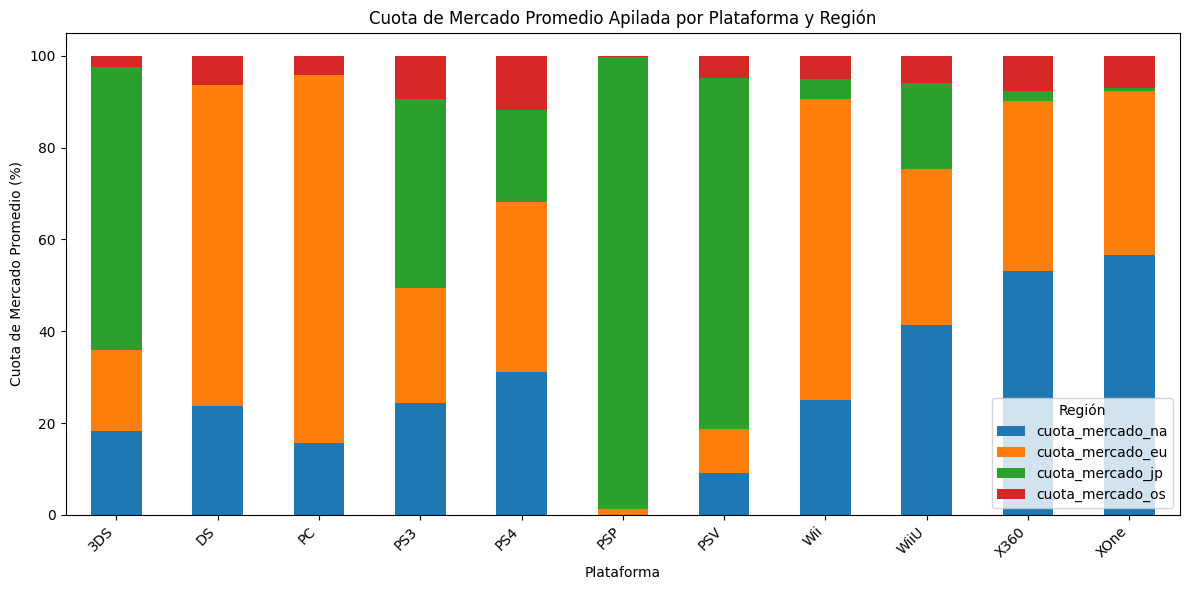

In [48]:
cuotas_mean_filtrado.set_index('platform').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cuota de Mercado Promedio Apilada por Plataforma y Región')
plt.xlabel('Plataforma')
plt.ylabel('Cuota de Mercado Promedio (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.tight_layout()
plt.show()

**Valores maximos de cuota de mercado (%) por plataforma por region**<br>
En este caso, al colocar los valores maximos por plataforma, podemos observar que plataforma tiene mas impacto en cada region, con ello pordemos ver que las plataformas que mayor impacto tienen de forma mas equiparable en las regiones son PS2 y N64 seguidas de PS3, considerando tambien las otras ventas ('other sales')

In [49]:
cuotas_max_filtrado = games_filtrado.groupby('platform')[['cuota_mercado_na','cuota_mercado_eu','cuota_mercado_jp','cuota_mercado_os']].max().reset_index()
cuotas_max_filtrado.head()

,platform,cuota_mercado_na,cuota_mercado_eu,cuota_mercado_jp,cuota_mercado_os
0,3DS,100.000000,100.0,100.0,16.666667
1,DS,57.894737,100.0,0.0,12.500000
2,PC,100.000000,100.0,0.0,20.000000
3,PS3,100.000000,100.0,100.0,33.333333
4,PS4,100.000000,100.0,100.0,33.333333


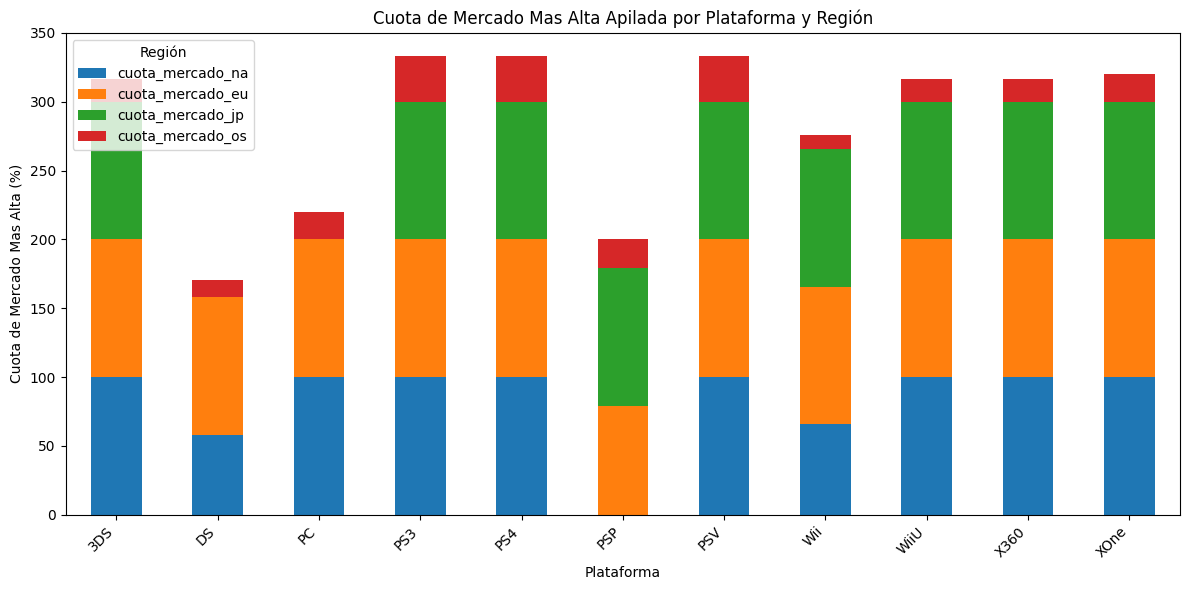

In [50]:
cuotas_max_filtrado.set_index('platform').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cuota de Mercado Mas Alta Apilada por Plataforma y Región')
plt.xlabel('Plataforma')
plt.ylabel('Cuota de Mercado Mas Alta (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.tight_layout()
plt.show()

**Comparativa por genero por region**

In [51]:
comparativa_genero = games.groupby('genre')[['cuota_mercado_na','cuota_mercado_eu','cuota_mercado_jp','cuota_mercado_os']].mean().reset_index()
comparativa_genero

,genre,cuota_mercado_na,cuota_mercado_eu,cuota_mercado_jp,cuota_mercado_os
0,Action,47.445725,25.073889,20.497380,6.983007
1,Adventure,27.253888,16.595848,52.542832,3.607432
2,Fighting,42.148669,17.068032,34.954546,5.828753
3,Misc,48.863893,19.393657,25.421120,6.321329
4,Platform,57.757949,24.149264,12.150036,5.942752
5,Puzzle,56.916511,21.014849,17.578087,4.490553
6,Racing,55.511002,30.962442,5.959903,7.566653
7,Role-Playing,29.735645,15.673734,49.623538,4.967083
8,Shooter,54.770330,29.343064,8.363003,7.523603
9,Simulation,48.538761,23.362414,21.809113,6.289713


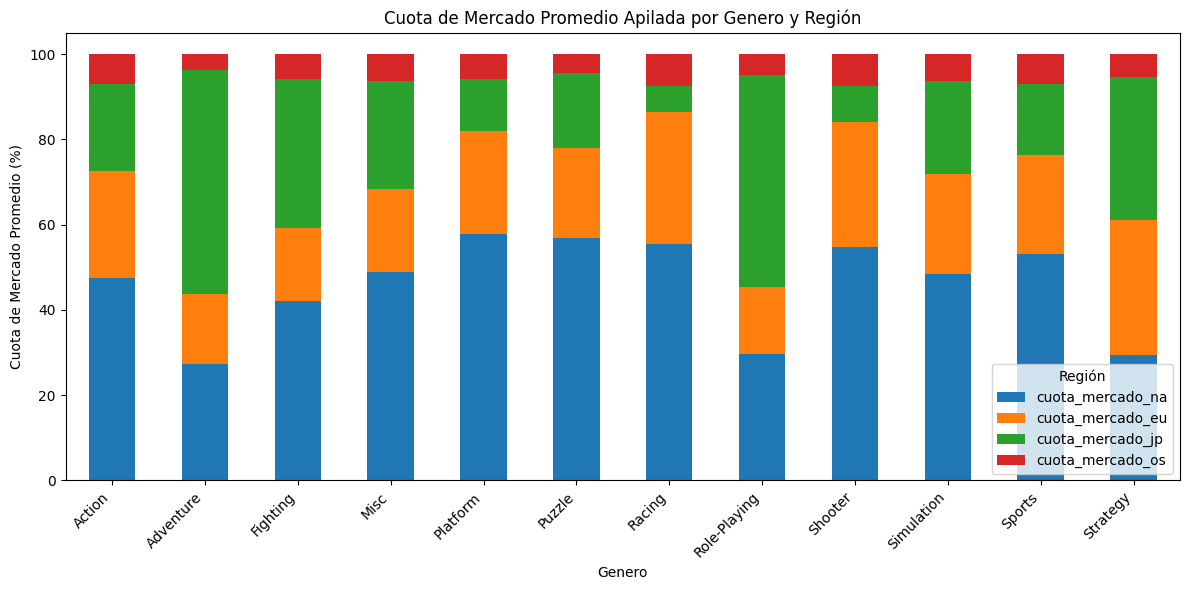

In [52]:
comparativa_genero.set_index('genre').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cuota de Mercado Promedio Apilada por Genero y Región')
plt.xlabel('Genero')
plt.ylabel('Cuota de Mercado Promedio (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.tight_layout()
plt.show()

In [53]:
compara_genero_2013_2016 = games_filtrado.groupby('genre')[['cuota_mercado_na','cuota_mercado_eu','cuota_mercado_jp','cuota_mercado_os']].mean().reset_index()
compara_genero_2013_2016

,genre,cuota_mercado_na,cuota_mercado_eu,cuota_mercado_jp,cuota_mercado_os
0,Action,27.180130,32.093166,34.094017,6.632686
1,Adventure,17.123364,18.141821,60.762444,3.972371
2,Fighting,28.904957,20.089684,42.967415,8.037944
3,Misc,28.431861,19.791546,46.732221,5.044371
4,Platform,42.703294,36.546470,10.797286,9.952950
5,Puzzle,18.985418,29.980824,48.217321,2.816438
6,Racing,23.849316,61.343231,5.709174,9.098279
7,Role-Playing,21.032100,17.803788,55.336889,5.827223
8,Shooter,45.116401,40.509134,3.865375,10.509090
9,Simulation,18.176248,49.069313,28.116459,4.637980


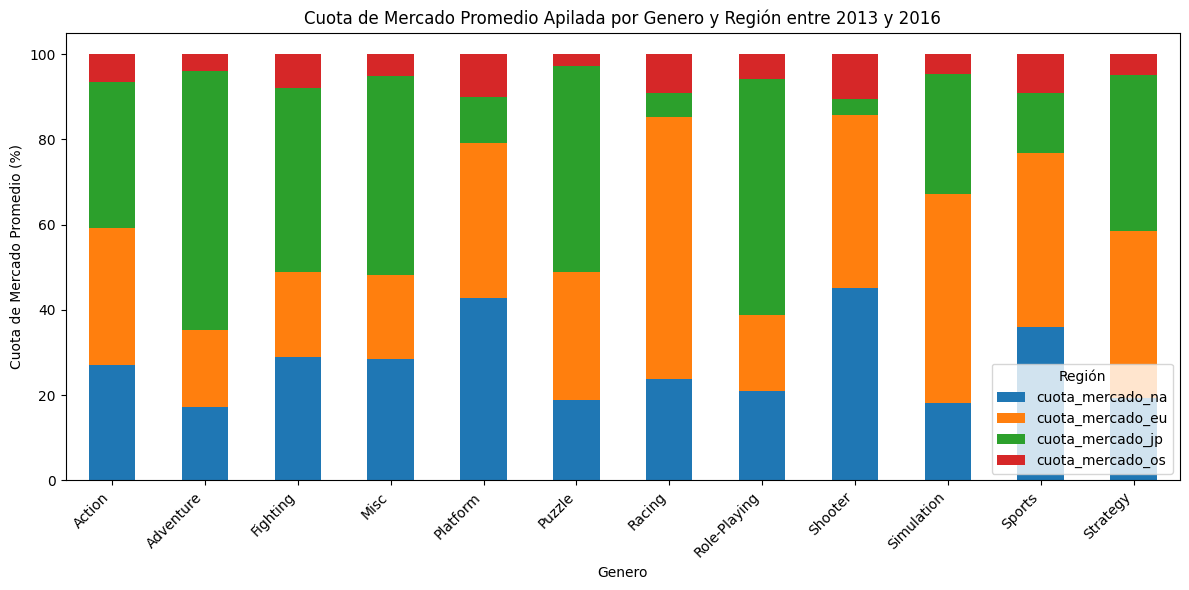

In [54]:
compara_genero_2013_2016.set_index('genre').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cuota de Mercado Promedio Apilada por Genero y Región entre 2013 y 2016')
plt.xlabel('Genero')
plt.ylabel('Cuota de Mercado Promedio (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.tight_layout()
plt.show()

**Los primeros 5 generos con mayor % en cuota de mercado en Norteamerica (na) entre 2013 y 2016**

In [55]:
#Agrupamos por genero, filtramos por cuota de mercado en na, ordenamos por el mayor
genero_na = games_filtrado.groupby('genre')['cuota_mercado_na'].mean().reset_index()
top_genre_na = genero_na.sort_values(by='cuota_mercado_na', ascending=False)
top_genre_na.head()

,genre,cuota_mercado_na
8,Shooter,45.116401
4,Platform,42.703294
10,Sports,36.026465
2,Fighting,28.904957
3,Misc,28.431861


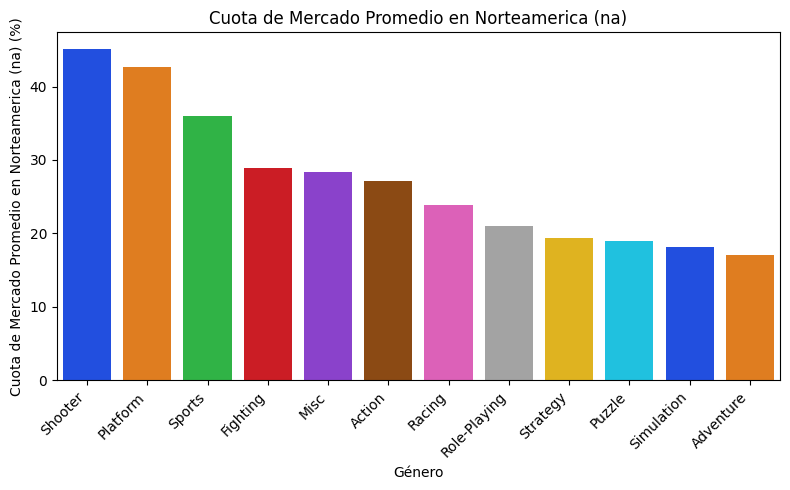

In [56]:
plt.figure(figsize=(8, 5))
sns.barplot(x='genre', y='cuota_mercado_na', data=top_genre_na, palette='bright')
plt.title('Cuota de Mercado Promedio en Norteamerica (na)')
plt.xlabel('Género')
plt.ylabel('Cuota de Mercado Promedio en Norteamerica (na) (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 5 de generos con mayor % promedio de cuota de mercado en Union Europea (eu) entre 2013 y 2016**

In [57]:
genero_eu = games_filtrado.groupby('genre')['cuota_mercado_eu'].mean().reset_index()
top_genre_eu = genero_eu.sort_values(by='cuota_mercado_eu', ascending=False)
top_genre_eu.head()

,genre,cuota_mercado_eu
6,Racing,61.343231
9,Simulation,49.069313
10,Sports,40.869149
8,Shooter,40.509134
11,Strategy,39.019206


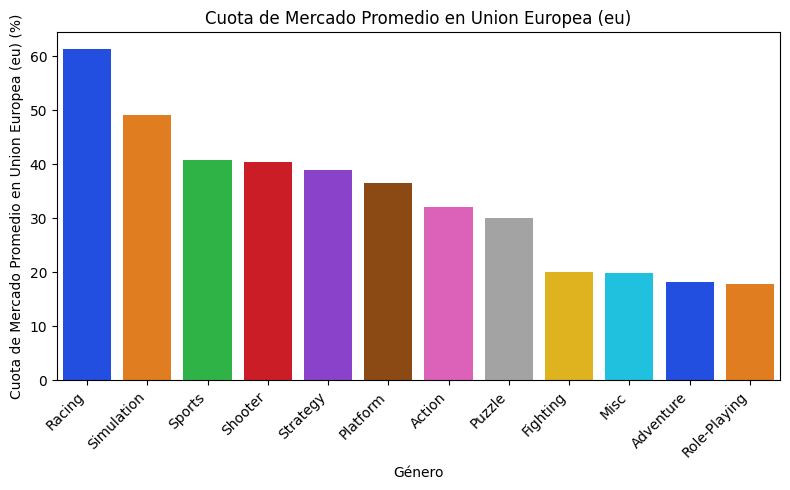

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(x='genre', y='cuota_mercado_eu', data=top_genre_eu,palette='bright')
plt.title('Cuota de Mercado Promedio en Union Europea (eu)')
plt.xlabel('Género')
plt.ylabel('Cuota de Mercado Promedio en Union Europea (eu) (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 5 de generos con mayor % promedio de cuota de mercado en Japon (jp) entre 2013 y 2016**

In [59]:
genero_jp = games_filtrado.groupby('genre')['cuota_mercado_jp'].mean().reset_index()
top_genre_jp = genero_jp.sort_values(by='cuota_mercado_jp', ascending=False)
top_genre_jp.head()

,genre,cuota_mercado_jp
1,Adventure,60.762444
7,Role-Playing,55.336889
5,Puzzle,48.217321
3,Misc,46.732221
2,Fighting,42.967415


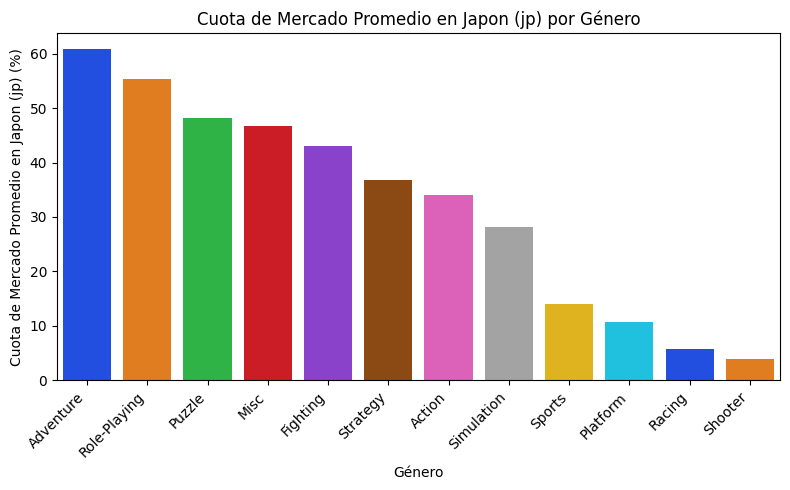

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(x='genre', y='cuota_mercado_jp', data=top_genre_jp, palette='bright')
plt.title('Cuota de Mercado Promedio en Japon (jp) por Género')
plt.xlabel('Género')
plt.ylabel('Cuota de Mercado Promedio en Japon (jp) (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 5 de generos con mayor % promedio de cuota de mercado en Otras ventas (os) entre 2013 y 2016**

In [61]:
genero_os = games_filtrado.groupby('genre')['cuota_mercado_os'].mean().reset_index()
top_genre_os = genero_os.sort_values(by='cuota_mercado_os', ascending=False)
top_genre_os.head()

,genre,cuota_mercado_os
8,Shooter,10.509090
4,Platform,9.952950
10,Sports,9.136134
6,Racing,9.098279
2,Fighting,8.037944


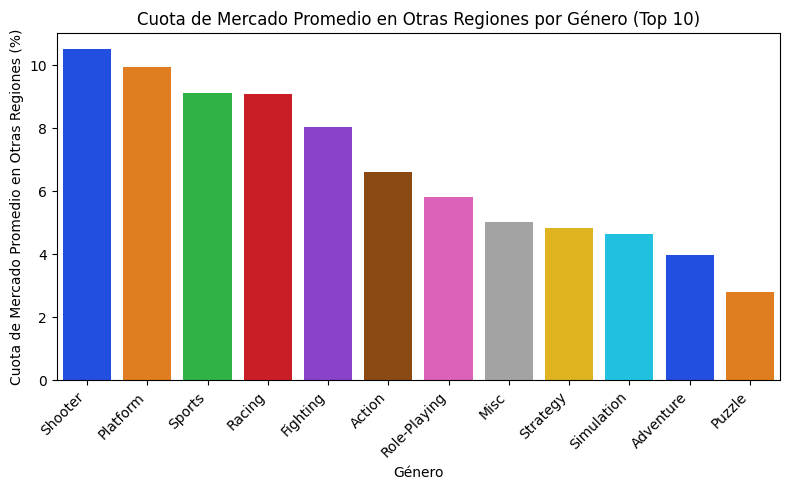

In [62]:
plt.figure(figsize=(8, 5))
sns.barplot(x='genre', y='cuota_mercado_os', data=top_genre_os,palette='bright')
plt.title('Cuota de Mercado Promedio en Otras Regiones por Género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Cuota de Mercado Promedio en Otras Regiones (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Clasificaciones vs ventas totales**

In [63]:
clasif_total_sales = games.groupby('rating')['total_sales'].max()
clasif_ordenadas = clasif_total_sales.sort_values(ascending=False)
clasif_ordenadas.reset_index()

,rating,total_sales
0,E,82.54
1,M,21.05
2,T,12.84
3,E10+,10.12
4,K-A,2.40
5,AO,1.96
6,EC,0.45
7,RP,0.04


**Comparativa entre ventas de cada region vs rating ESRB**<br>
De forma clara se logra observar que la clasificacion con mayores ventas registradas en casi todas las regiones es la clasificacion E (todos), seguida de M (mayores de 17) y T (adolescentes)<br>
Esto de cierta forma puede indicar una tendencia de quienes son los principales consumidores de estos productos, sobre todo en Norteamerica, que son los mayores consumidores, seguidos de la Union Europea y otras regiones, dejando a japon en ultimo sitio<br>
Sin embargo, debemos considerar la media poblacional, ya que no es la misma en cada region, varia por mucho en cuanto a densidad y tamaño se refiere, solo por mencionar un factor, aunque podemos incidir que japon es uno de los mayores proveedores (por los datos observados anteriormente) y Norteamerica el mayor consumidor

In [64]:
comparativa_rating_sales = games.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']].max()
rating_sales = comparativa_rating_sales.sort_values(by=['na_sales','eu_sales','jp_sales','other_sales'], ascending=False)
rating_sales.reset_index()

,rating,na_sales,eu_sales,jp_sales,other_sales
0,E,41.36,28.96,6.50,8.45
1,M,9.70,9.09,2.02,10.57
2,T,6.62,6.42,4.13,1.74
3,E10+,5.95,3.11,4.35,1.68
4,K-A,2.30,0.16,1.46,0.03
5,AO,1.26,0.61,0.00,0.09
6,EC,0.42,0.09,0.00,0.03
7,RP,0.00,0.04,0.00,0.01


**Prueba las hipotesis**<br>
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.<br>
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.<br>
- *Explica:*
-  Cómo formulaste las hipótesis nula y alternativa.
-  Qué criterio utilizaste para probar las hipótesis y por qué.

In [65]:
no_num = games['user_score'].unique()
no_num

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [66]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
avg_score = games.groupby('platform')['user_score'].mean()
avg_score.reset_index()

,platform,user_score
0,2600,0.000000
1,3DO,0.000000
2,3DS,2.561853
3,DC,2.296154
4,DS,2.598566
5,GB,0.000000
6,GBA,3.495714
7,GC,6.138411
8,GEN,0.000000
9,GG,0.000000


**Pruebas de hipotesis**<br>
Hipotesis:  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.<br>
Se utilizan ambos juegos y se separan con base en las ventas de cada uno.<br>

In [67]:
#Se separan las plataformas en cuestion y se evaluan por el total de ventas de cada una
xbox_one_scores = games[games['platform'] == 'XOne']['total_sales'].dropna()
pc_scores = games[games['platform'] == 'PC']['total_sales'].dropna()

alpha = 0.05
results = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print(results.pvalue)

Rechazamos la hipótesis nula
1.0196533966248761e-07


**Resultado:<br>**
Una vez que se aplica la hipotesis, esta nos indica que el resultado es menor que alpha (0.05), por tanto se rechaza la hipotesis nula, que sugiere que existe evidencia estadisticamente significativa de que son diferentes las calificaciones entre xbox one y PC

**Hipotesis 2**:<br> 
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.<br>

In [68]:
avg_score_genre = games.groupby('genre')['total_sales'].mean().reset_index()
avg_score_genre

,genre,total_sales
0,Action,0.517711
1,Adventure,0.182341
2,Fighting,0.527126
3,Misc,0.458577
4,Platform,0.932173
5,Puzzle,0.418224
6,Racing,0.583403
7,Role-Playing,0.623872
8,Shooter,0.795503
9,Simulation,0.446701


In [69]:
action_scores = games[games['genre'] == 'Action']['total_sales'].dropna()
sports_scores = games[games['genre'] == 'Sports']['total_sales'].dropna()

alpha = 0.05
results = st.ttest_ind(action_scores, sports_scores)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print(results.pvalue)

No podemos rechazar la hipótesis nula
0.25192508280998743


**Resultado**<br>
Una vez que se aplica la hipotesis, esta nos indica que el resultado es mayor que alpha (0.05), por tanto no podemos rechazar la hipotesis nula, lo que sugiere que no necesariamente existe evidencia estadisticamente significativa de que no son las mismas calificaciones de los usuarios entre los generos Accion ('Action') y Deportes ('Sports')

Se decidio utilizar la prueba t para realizar las hipotesis en ambos casos, genero y plataforma, ya que esta nos permite conocer valores de dos grupos independientes, plataformas (XBOX ONE - PC) y generos (ACTION - SPORTS) en diferentes circunstancias

La hipotesis nula se formulo al querer refutar el argumento incial que sugiere en ambos casos que las calificaciones promedio de los usuarios para las plataformas y el genero son contrarias a lo que se plantea, en ambos casos el resultado indica que existe evidencia estadisticamente significativa de tal situacion

Calificaciones promedio para Plataformas (XBOX one - PC): Estadisticamente diferentes
Calificaciones promedio para generos (Action - Sports): Estadisticamente diferentes

**CONCLUSION GENERAL**<br>

- A pesar de tener diferentes variables que indiquen cierta cantidad de valores, para tratar de obtener ciertas respuestas, parece ser que no son suficientes, ya que surgen nuevas incognitas por resolver, sin embargo, los datos mostrados siempre son de utilidad para conocer ciertos patrones que favorecen el desgloce de la informacion para tener un panorama mas amplio sobre el tema.<br>
- Es importante considerar otras fuentes de informacion sobre el tema, sobre todo cuando no se maneja del todo, ya que algunos conceptos pueden llegar a ser confusos si no se manejan de forma correcta, lo que puede generar inconvenientes a la hora de analizarlos.<br>
- Al comenzar a trabajar con el dataset, comienzas a descubrir a traves de la informacion plasmada que es importante tratar de obtener mas informacion a quienes estan encargados de la misma, ya que esto puede favorecer el enriquecimiento en el analisis y ampliar el panorama sobre los datos que se puedan obtener y mejorar la perspectiva de los mismos, con ello se puede tener una vision mas clara y amplia al momento de mostrar los resultados.<br>

**Plataformas**<br>
- Con la data obtenida podemos observar que la consola que mostro mayor porcentaje en la cuota de mercado, fue la PC con un notable 80% seguido de la consola DS con 69.92% en la region Europea (EU), en la region de Japon consola 3DS con un porcentaje de aporte de 61% y PS3 con un 41%, por otro lado en la region de Norteamerica predomina PS4 con un lejano 31.19% y otras regiones con la consola PS4 con apenas 11.81%, considerando el periodo de tiempo de 2013 a 2016, lo que pareciera indicar que el uso es muy notable en Europa duplicando el valor por encima de otras plataformas incluso respecto a las demas regiones.

**Genero**<br>
- Podemos observar que al distinguir las ventas respecto a cada genero, los numeros indican que la region Europea es la que lidera con un 61.34% con el genero Racing, seguido de Japon con 60.79% en genero Adventure, cabe mencionar que por lo menos las siguientes 5 posiciones se encuentran repartidas entre Japon y Europa, solo para tener perspectiva entre regiones, Norteamerica, tiene un 41% con el porcentaje mas alto de su region en genero Shooting, lo que nos indica que el consumo dista mucho respecto a las otras, sobre todo al ver los valores con registros mas elevados distribuidos en diferentes generos antes de llegar al mas alto de Norteamerica, dejando con solo un 10.5% en el genero shooting en otras regiones (OS).